# Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


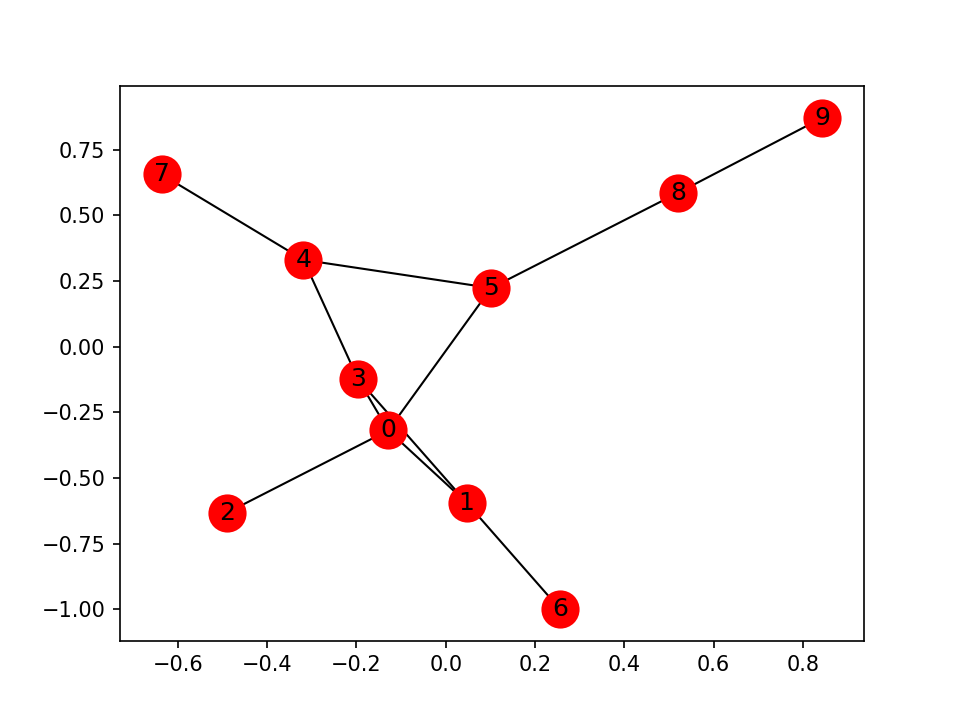

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

### Adjacency List

In [ ]:
!cat G_adjlist.txt

In [ ]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

### Adjacency Matrix

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

In [ ]:
G3 = nx.Graph(G_mat)
G3.edges()

### Edgelist

In [ ]:
!cat G_edgelist.txt

In [ ]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

### Pandas DataFrame

In [ ]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

In [ ]:
G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

### Chess Example

In [ ]:
!head -5 chess_graph

In [3]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [4]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [5]:
chess.edges(data=True)

OutMultiEdgeDataView([('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}), ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}), ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}), ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}), ('1', '1214', {'outcome': 0, 'tim

In [ ]:
games_played = chess.degree()
games_played

In [ ]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

In [6]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

ValueError: DataFrame constructor not properly called!

In [ ]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

In [ ]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

In [ ]:
win_count.nlargest(5, 'outcome')